In [ ]:
# ВНИМАНИЕ; версия Pillow установвленна по умолчанию - '7.0.0'
# Эта версия ломает torchvision
import PIL
PIL.__version__

'5.3.0'

In [ ]:
!pip uninstall -y Pillow
!pip install -Iv Pillow==5.3.0

Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
Created temporary directory: /tmp/pip-ephem-wheel-cache-a_stctw5
Created temporary directory: /tmp/pip-req-tracker-lcn2tv31
Created requirements tracker '/tmp/pip-req-tracker-lcn2tv31'
Created temporary directory: /tmp/pip-install-c9p67rgg
1 location(s) to search for versions of Pillow:
* https://pypi.org/simple/pillow/
Getting page https://pypi.org/simple/pillow/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/pillow/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/pillow/ HTTP/1.1" 200 187888
Updating cache with response from "https://pypi.org/simple/pillow/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/pillow/
  Found link https://files.pythonhosted.org/packages/72/e6/692512c5d9dc97f83a91f8a75806e0b9e910ebd8d6b0b3d6ca9a249c1e26/Pillow-1.0.tar.gz#sha256=be8643522995b496

---


**ВНИМАНИЕ: На этом этапе обязательно перезагрузить рантайм (Runtime -> Restart Runtime). Иначе версия 5.3.0 не будет загружена в рантайм.**

После перезапуска рантайма следует продолжить исполнять ячейки далее.

---



## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [ ]:
!pip install -U torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.7/dist-packages (1.8.1+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.7/dist-packages (0.9.1+cu101)


In [ ]:
# ИСПРАВЛЕНИЕ: к сожалению этот код не работает у меня на коллабе
# плюс что-то намудрено с именами в репозитории pytorch
  
# установка подходящей версии torch

#from os.path import exists
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.5.0%2B{platform}-linux_x86_64.whl torchvision
#import torch

In [ ]:
# ИСПРАВЛЕНИЕ:
# Вручную ищем и устанавливаем подходящуюю версию 
# https://download.pytorch.org/whl/torch_stable.html 
# !pip install -q 'https://download.pytorch.org/whl/cu101/torch-1.5.0%2Bcu101-cp36-cp36m-linux_x86_64.whl' torchvision
# import torch

In [ ]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).




---

**ВНИМАНИЕ: скачайте датасет с каггла и положите его в корень своего гугл диска!**

---



In [ ]:
# !mkdir gdrive/MyDrive/springfield_data

In [ ]:
# !unzip -q gdrive/MyDrive/journey-springfield.zip -d gdrive/MyDrive/springfield_data/

In [ ]:
# !ls gdrive/MyDrive/springfield_data/

In [ ]:
!unzip -q gdrive/MyDrive/journey-springfield.zip
!ls train

replace characters_illustration.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
simpsons_dataset


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Sat Apr 24 09:33:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
from skimage import io
import random

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from torchvision import models

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [ ]:
SEED = 1042

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")



https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} \\$,      константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
# для преобразования картинок к квадратному виду
class SquarePad:
	def __call__(self, image):
		w, h = image.size
		max_wh = np.max([w, h])
		hp = int((max_wh - w) / 2)
		vp = int((max_wh - h) / 2)
		padding = (hp, vp, hp, vp)
		return transforms.functional.pad(image, padding, 0, 'constant')

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # self.files = files
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        if self.mode == 'train': 
            transform = transforms.Compose([
                # SquarePad(),
                transforms.RandomRotation(degrees=30),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(hue=.1, saturation=.1),
                transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                # transforms.CenterCrop(200),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        else:
            transform = transforms.Compose([
                # SquarePad(),
                transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        x = self.load_sample(self.files[index])
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

train_dataset = SimpsonsDataset(train_files, mode='train')
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
def create_dct_path_labels(train_files, train_labels):
    dct_simpsons = {}
    for path_i, label_i in zip(sorted(train_files), train_labels):
        if label_i not in dct_simpsons:
          dct_simpsons[label_i] = []
          dct_simpsons[label_i].append(path_i)
        else:
          dct_simpsons[label_i].append(path_i)
    return dct_simpsons


# Создадим словарь в котором ключами будут персонажи Симпсонов, а значениями списки с путями к картинкам.
dct_path_train = create_dct_path_labels(train_files, train_dataset.labels)

num_pics = 100 # дополним до нужной цифры количество картинок если их недостаточно 
for person in dct_path_train:
    if len(dct_path_train[person]) < num_pics:
        dct_path_train[person] = dct_path_train[person] * (num_pics // len(dct_path_train[person]))
        dct_path_train[person].extend(dct_path_train[person][:num_pics - len(dct_path_train[person])])
# Проверим что получилось 
for person in dct_path_train:
    print(f"{person}\t{len(dct_path_train[person])}")
new_train_files = []

for person in dct_path_train:
    new_train_files.extend(dct_path_train[person])

new_train_dataset = SimpsonsDataset(new_train_files, mode='train')

abraham_grampa_simpson	685
agnes_skinner	100
apu_nahasapeemapetilon	467
barney_gumble	100
bart_simpson	1006
carl_carlson	100
charles_montgomery_burns	895
chief_wiggum	739
cletus_spuckler	100
comic_book_guy	352
disco_stu	100
edna_krabappel	343
fat_tony	100
gil	100
groundskeeper_willie	100
homer_simpson	1684
kent_brockman	373
krusty_the_clown	904
lenny_leonard	233
lionel_hutz	100
lisa_simpson	1015
maggie_simpson	100
marge_simpson	968
martin_prince	100
mayor_quimby	185
milhouse_van_houten	809
miss_hoover	100
moe_szyslak	1089
ned_flanders	1090
nelson_muntz	269
otto_mann	100
patty_bouvier	100
principal_skinner	895
professor_john_frink	100
rainier_wolfcastle	100
ralph_wiggum	100
selma_bouvier	100
sideshow_bob	658
sideshow_mel	100
snake_jailbird	100
troy_mcclure	100
waylon_smithers	136


In [ ]:
# def create_dct_path_labels(train_files, train_labels):
#     dct_simpsons = {}
#     for label_i in np.unique(train_labels).tolist():
#         dct_simpsons[label_i] = []

#     for path_i, label_i in zip(sorted(train_files), train_labels):
#         dct_simpsons[label_i].append(path_i)
#     # print(path_i, label_i,dct_simpsons[label_i][:2])
#     return dct_simpsons

# # Создадим словарь в котором ключами будут персонажи Симпсонов, а значениями списки с путями к картинкам.
# dct_path_train = create_dct_path_labels(train_files, train_dataset.labels)

# # Дополним картинки классов у которых менее 100 картинок, до 100 картинок в классе
# for person in dct_path_train:
#     if len(dct_path_train[person]) < 100:
#         dct_path_train[person] = dct_path_train[person] * (100 // len(dct_path_train[person]))
#         dct_path_train[person].extend(dct_path_train[person][:100 - len(dct_path_train[person])])
# # Проверим что получилось 
# for person in dct_path_train:
#     print(f"{person}\t{len(dct_path_train[person])}")
#     # print(dct_path_train[person][:1])
# new_train_files = []

# for person in dct_path_train:
#     new_train_files.extend(dct_path_train[person])

# new_train_dataset = SimpsonsDataset(new_train_files, mode='train')

In [ ]:
# проверим 
d = {}
for i in new_train_files:
  temp = str(i).split('/')
  name = temp[-2]
  file_n = temp[-1]
  # print(name, file_n)
  # break
  if name not in d:
    d[name] = []
    d[name].append(file_n)
  else:
    d[name].append(file_n)

for person in d:
    print(f"new {person}\t{len(d[person])}")
    print(f"old {person}\t{len(dct_path_train[person])}")

len(d['marge_simpson']) - len(dct_path_train['marge_simpson']), list(zip(d[name], dct_path_train[name]))[-1]

new abraham_grampa_simpson	685
old abraham_grampa_simpson	685
new agnes_skinner	100
old agnes_skinner	100
new apu_nahasapeemapetilon	467
old apu_nahasapeemapetilon	467
new barney_gumble	100
old barney_gumble	100
new bart_simpson	1006
old bart_simpson	1006
new carl_carlson	100
old carl_carlson	100
new charles_montgomery_burns	895
old charles_montgomery_burns	895
new chief_wiggum	739
old chief_wiggum	739
new cletus_spuckler	100
old cletus_spuckler	100
new comic_book_guy	352
old comic_book_guy	352
new disco_stu	100
old disco_stu	100
new edna_krabappel	343
old edna_krabappel	343
new fat_tony	100
old fat_tony	100
new gil	100
old gil	100
new groundskeeper_willie	100
old groundskeeper_willie	100
new homer_simpson	1684
old homer_simpson	1684
new kent_brockman	373
old kent_brockman	373
new krusty_the_clown	904
old krusty_the_clown	904
new lenny_leonard	233
old lenny_leonard	233
new lionel_hutz	100
old lionel_hutz	100
new lisa_simpson	1015
old lisa_simpson	1015
new maggie_simpson	100
old maggie_

(0,
 ('pic_0179.jpg',
  PosixPath('train/simpsons_dataset/waylon_smithers/pic_0179.jpg')))

In [ ]:
# проверяем сколько прибавилось и каких картинок
import pandas as pd 

n = pd.Series(new_train_files).value_counts()
print('Прибавилось картинок',  n[n > 1].sum(), '\n')
n[n > 1]

Прибавилось картинок 1716 



train/simpsons_dataset/lionel_hutz/pic_0001.jpg      50
train/simpsons_dataset/lionel_hutz/pic_0002.jpg      50
train/simpsons_dataset/troy_mcclure/pic_0004.jpg     17
train/simpsons_dataset/troy_mcclure/pic_0002.jpg     17
train/simpsons_dataset/disco_stu/pic_0003.jpg        17
                                                     ..
train/simpsons_dataset/patty_bouvier/pic_0047.jpg     2
train/simpsons_dataset/patty_bouvier/pic_0057.jpg     2
train/simpsons_dataset/barney_gumble/pic_0018.jpg     2
train/simpsons_dataset/patty_bouvier/pic_0058.jpg     2
train/simpsons_dataset/martin_prince/pic_0012.jpg     2
Length: 520, dtype: int64

Давайте посмотрим на наших героев внутри датасета.

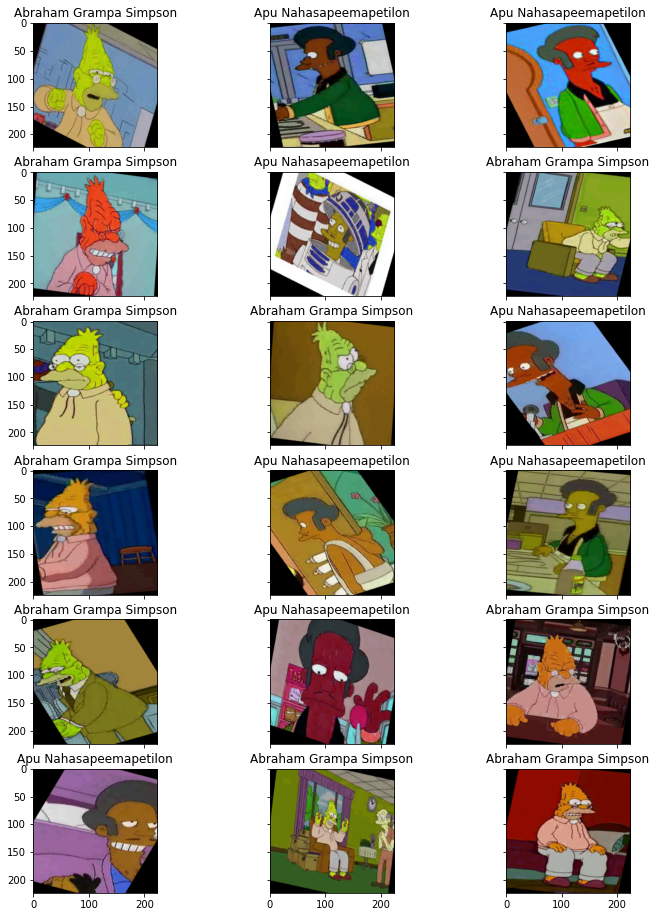

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=3,figsize=(12, 16), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = new_train_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                new_train_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_dataset, val_dataset, model, epochs, batch_size, shuffle=True, sampler=None):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, sampler=sampler, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.AdamW(model.parameters())
        scheduler = torch.optim.lr_scheduler.StepLR(opt, 3, 0.5)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            scheduler.step()
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
# simple_cnn = SimpleCnn(n_classes).to(DEVICE)
# print("we will classify :{}".format(n_classes))
# print(simple_cnn)

In [ ]:
model_resnet = models.resnet18(pretrained=True).to(DEVICE)
child_counter = 0
for child in model_resnet.children():
    print(" child", child_counter, "is:")
    print(child)
    child_counter += 1

 child 0 is:
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
 child 1 is:
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 child 2 is:
ReLU(inplace=True)
 child 3 is:
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
 child 4 is:
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64

In [ ]:
# Выключаем подсчет градиентов для слоев, которые не будем обучать
for i, child in enumerate(model_resnet.children()):
    if i not in [9]:
        for param in child.parameters():
            param.requires_grad = False

model_resnet.fc = nn.Sequential(nn.Linear(512,42))

In [ ]:
model_resnet = model_resnet.cuda()

In [ ]:
# Запустим обучение сети

history = train(new_train_dataset, val_dataset, model=model_resnet, epochs=2, 
#                 sampler=sampler_wht,
                batch_size=64
               )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
epoch:   0%|          | 0/2 [00:00<?, ?it/s]

loss 2.5670435078717717


epoch:  50%|█████     | 1/2 [05:18<05:18, 318.53s/it]


Epoch 001 train_loss: 2.5670     val_loss 1.8285 train_acc 0.3507 val_acc 0.5566
loss 1.7837229921536248


epoch: 100%|██████████| 2/2 [10:36<00:00, 318.15s/it]


Epoch 002 train_loss: 1.7837     val_loss 1.5055 train_acc 0.5454 val_acc 0.6074


In [ ]:
import copy

# сохранить веса нашей нейросети model
model_pre_weights = copy.deepcopy(model_resnet.state_dict())
torch.save(model_pre_weights, "path_to\\model_pre_weights.pth")

In [ ]:
# Включаем все слои!!!
for child in model_resnet.children():
    for param in child.parameters():
        param.requires_grad = True

In [ ]:
# Ну, с богом!!!
history = train(new_train_dataset, val_dataset, model=model_resnet, epochs=25, batch_size=64)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
epoch:   0%|          | 0/25 [00:00<?, ?it/s]

loss 3.706382742503861


epoch:   4%|▍         | 1/25 [05:24<2:09:45, 324.40s/it]


Epoch 001 train_loss: 3.7064     val_loss 3.1413 train_acc 0.0962 val_acc 0.1074
loss 3.2996006950819834


epoch:   8%|▊         | 2/25 [10:48<2:04:18, 324.30s/it]


Epoch 002 train_loss: 3.2996     val_loss 3.1361 train_acc 0.0997 val_acc 0.1074
loss 3.3118950549439234


epoch:  12%|█▏        | 3/25 [16:12<1:58:55, 324.33s/it]


Epoch 003 train_loss: 3.3119     val_loss 3.1677 train_acc 0.0984 val_acc 0.1074
loss 3.2901800497709277


epoch:  16%|█▌        | 4/25 [21:36<1:53:28, 324.20s/it]


Epoch 004 train_loss: 3.2902     val_loss 3.0730 train_acc 0.0993 val_acc 0.1074
loss 3.158157130676319


epoch:  20%|██        | 5/25 [27:00<1:47:58, 323.93s/it]


Epoch 005 train_loss: 3.1582     val_loss 2.8421 train_acc 0.1327 val_acc 0.1922
loss 2.8049283493902246


epoch:  24%|██▍       | 6/25 [32:26<1:42:50, 324.77s/it]


Epoch 006 train_loss: 2.8049     val_loss 2.2741 train_acc 0.2260 val_acc 0.3494
loss 2.3126426233134705


epoch:  28%|██▊       | 7/25 [37:50<1:37:20, 324.46s/it]


Epoch 007 train_loss: 2.3126     val_loss 1.9235 train_acc 0.3606 val_acc 0.4582
loss 1.9790540593938384


epoch:  32%|███▏      | 8/25 [43:16<1:32:05, 325.05s/it]


Epoch 008 train_loss: 1.9791     val_loss 1.5842 train_acc 0.4552 val_acc 0.5606
loss 1.6816301524692048


epoch:  36%|███▌      | 9/25 [48:40<1:26:32, 324.55s/it]


Epoch 009 train_loss: 1.6816     val_loss 1.3082 train_acc 0.5300 val_acc 0.6439
loss 1.351633513450058


epoch:  40%|████      | 10/25 [54:03<1:21:04, 324.28s/it]


Epoch 010 train_loss: 1.3516     val_loss 1.1492 train_acc 0.6257 val_acc 0.6817
loss 1.212070425327941


epoch:  44%|████▍     | 11/25 [59:27<1:15:38, 324.16s/it]


Epoch 011 train_loss: 1.2121     val_loss 1.0151 train_acc 0.6575 val_acc 0.7207
loss 1.0833960223635402


epoch:  48%|████▊     | 12/25 [1:04:51<1:10:11, 323.93s/it]


Epoch 012 train_loss: 1.0834     val_loss 0.9655 train_acc 0.6978 val_acc 0.7407
loss 0.91944037554849


epoch:  52%|█████▏    | 13/25 [1:10:11<1:04:32, 322.71s/it]


Epoch 013 train_loss: 0.9194     val_loss 0.8679 train_acc 0.7405 val_acc 0.7661
loss 0.8500674496003248


epoch:  56%|█████▌    | 14/25 [1:15:31<59:01, 321.97s/it]


Epoch 014 train_loss: 0.8501     val_loss 0.7908 train_acc 0.7587 val_acc 0.7853
loss 0.782778664330612


epoch:  60%|██████    | 15/25 [1:20:52<53:37, 321.79s/it]


Epoch 015 train_loss: 0.7828     val_loss 0.7378 train_acc 0.7773 val_acc 0.7990
loss 0.7048078551698839


epoch:  64%|██████▍   | 16/25 [1:26:15<48:18, 322.05s/it]


Epoch 016 train_loss: 0.7048     val_loss 0.6941 train_acc 0.8038 val_acc 0.8122
loss 0.6584026468262302


epoch:  68%|██████▊   | 17/25 [1:31:42<43:08, 323.56s/it]


Epoch 017 train_loss: 0.6584     val_loss 0.6640 train_acc 0.8120 val_acc 0.8216
loss 0.6426699223621387


epoch:  72%|███████▏  | 18/25 [1:37:07<37:47, 323.86s/it]


Epoch 018 train_loss: 0.6427     val_loss 0.6577 train_acc 0.8205 val_acc 0.8237
loss 0.596690639168174


epoch:  76%|███████▌  | 19/25 [1:42:31<32:23, 323.89s/it]


Epoch 019 train_loss: 0.5967     val_loss 0.6283 train_acc 0.8306 val_acc 0.8344
loss 0.5711163287598129


epoch:  80%|████████  | 20/25 [1:47:56<27:01, 324.28s/it]


Epoch 020 train_loss: 0.5711     val_loss 0.6283 train_acc 0.8400 val_acc 0.8382
loss 0.558164780485309


epoch:  84%|████████▍ | 21/25 [1:53:19<21:35, 323.85s/it]


Epoch 021 train_loss: 0.5582     val_loss 0.6038 train_acc 0.8434 val_acc 0.8451


In [ ]:
# сохранить веса нашей нейросети model
model_25epoch_weights = copy.deepcopy(model_resnet.state_dict())
torch.save(model_25epoch_weights, "path_to\\model_25epoch_weights.pth")

In [ ]:
# загружаем сохраненное состояние весов нейросети
# model_resnet.load_state_dict(torch.load("path_to\\model_pre_weights.pth"))

In [ ]:
# if val_dataset is None:
#     val_dataset = SimpsonsDataset(val_files, mode='val')
    
# train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
# history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)

In [ ]:
# simple  Epoch 002 train_loss: 1.6633     val_loss 1.4100 train_acc 0.5418 val_acc 0.6274
# resnet 2 epoch 
    # Epoch 001 train_loss: 2.6554     val_loss 1.8491 train_acc 0.3229 val_acc 0.5355
    # Epoch 002 train_loss: 1.9053     val_loss 1.5163 train_acc 0.5129 val_acc 0.6030

    # Epoch 002 train_loss: 1.8428     val_loss 1.6375 train_acc 0.5319 val_acc 0.5862


#     epoch:   0%|          | 0/25 [00:00<?, ?it/s]loss 3.706382742503861
# epoch:   4%|▍         | 1/25 [05:24<2:09:45, 324.40s/it]
# Epoch 001 train_loss: 3.7064     val_loss 3.1413 train_acc 0.0962 val_acc 0.1074
# loss 3.2996006950819834
# epoch:   8%|▊         | 2/25 [10:48<2:04:18, 324.30s/it]
# Epoch 002 train_loss: 3.2996     val_loss 3.1361 train_acc 0.0997 val_acc 0.1074
# loss 3.3118950549439234
# epoch:  12%|█▏        | 3/25 [16:12<1:58:55, 324.33s/it]
# Epoch 003 train_loss: 3.3119     val_loss 3.1677 train_acc 0.0984 val_acc 0.1074
# loss 3.2901800497709277
# epoch:  16%|█▌        | 4/25 [21:36<1:53:28, 324.20s/it]
# Epoch 004 train_loss: 3.2902     val_loss 3.0730 train_acc 0.0993 val_acc 0.1074
# loss 3.158157130676319
# epoch:  20%|██        | 5/25 [27:00<1:47:58, 323.93s/it]
# Epoch 005 train_loss: 3.1582     val_loss 2.8421 train_acc 0.1327 val_acc 0.1922
# loss 2.8049283493902246
# epoch:  24%|██▍       | 6/25 [32:26<1:42:50, 324.77s/it]
# Epoch 006 train_loss: 2.8049     val_loss 2.2741 train_acc 0.2260 val_acc 0.3494


# resnet 25 epoch: 
#   Epoch 001 train_loss: 3.6288     val_loss 3.1305 train_acc 0.1018 val_acc 0.1074
#   Epoch 025 train_loss: 0.2980     val_loss 0.5036 train_acc 0.9176 val_acc 0.8768

Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(model_resnet, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(model_resnet, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_labels, y_pred, average='micro')


In [ ]:
# 0.26965811965811964
# 0.95 resnet 25epoch

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(model_resnet, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(model_resnet, test_loader)

preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
# ДОБАВЛЕНО: создание сабмита
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/MyDrive/resnet3.csv', index=False)
# файл появится у вас на гугл диске

In [ ]:
! ls gdrive/MyDrive/

In [ ]:
# ЗДЕСЬ что-то не работает. Не понятно зачем читайют лейблы 
#import pandas as pd
#my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
#my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
#my_submit.head()

In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)
